#### Using Transformers pipeline to generate text summary 

In [2]:
!pip3 install transformers 

In [3]:
from transformers import pipeline 
from bs4 import BeautifulSoup
import requests 


#### 1.Load Summarization Pipeline

In [6]:
summarizer=pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

#### 2.Web Scrapping blog post from medium

In [7]:
URL = "https://hackernoon.com/will-the-game-stop-with-gamestop-or-is-this-just-the-beginning-2j1x32aa"

In [8]:
r=requests.get(URL)
#grabbing the entire webpage in r here

In [9]:
r
#respone 200 is the status code which means it was successful 

<Response [200]>

In [11]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all(['h1', 'p'])

In [12]:
results

[<h1 class="story-title" style="text-align:left">Will The Game Stop with Gamestop Or Is This Just The Beginning?</h1>,
 <p style="margin:0">Crypto, Markets, Trading</p>,
 <p class="paragraph">The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business.</p>,
 <p class="paragraph">The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity. There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop. The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers.</p>,
 <p class="paragraph">One of the historical realities of this game has been that macro-inv

#### concatenating and joining all the texts/tag sentences into one single text

In [13]:
text = [result.text for result in results]
ARTICLE = ' '.join(text)

In [14]:
ARTICLE

'Will The Game Stop with Gamestop Or Is This Just The Beginning? Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business. The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity. There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop. The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers. One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard time making money in markets

### 3. Chunck texting and feeding it to the model 

['will', 'the', 'game', 'stop', 'with', 'gamestop', 'or', 'is', 'this', 'just', 'the', 'beginning', 'crypto', 'markets', 'trading', 'the', 'gamestop', 'squeeze', 'on', 'is', 'an', 'extraordinary', 'event', 'in', 'markets', 'where', 'at', 'face', 'value', 'retail', 'traders', 'and', 'investors', 'have', 'worked', 'together', 'in', 'an', 'attempt', 'to', 'put', 'some', 'of', 'the', 'largest', 'wall', 'street', 'institutions', 'out', 'of', 'business', 'the', 'events', 'can', 'be', 'interpreted', 'with', 'many', 'viable', 'lenses', 'and', 'there', 'are', 'ironies', 'baked', 'in', 'that', 'are', 'pure', 'serendipity', 'there', 'has', 'been', 'a', 'centrally', 'controlled', 'game', 'in', 'the', 'global', 'financial', 'system', 'in', 'which', 'insiders', 'benefited', 'while', 'outsiders', 'got', 'hurt', 'that', 'comes', 'to', 'a', 'head', 'with', 'a', 'company', 'called', 'gamestop', 'the', 'broking', 'firm', 'of', 'most', 'of', 'the', 'retail', 'side', 'of', 'this', 'warfare', 'robinhood', '

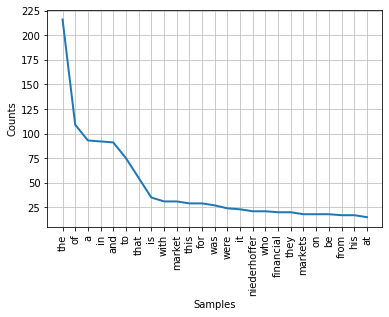

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import webtext
from nltk.probability import FreqDist
import nltk
import matplotlib.pyplot as plt

words = nltk.word_tokenize(ARTICLE)

words=[word.lower() for word in words if word.isalpha()]
print(words)   


for i in range(len(sorted(words))):
    print("%s: %s" % (i, words[i]))
 
data_analysis = nltk.FreqDist(words)

data_analysis.plot(25, cumulative=False)

#### we can see that zips law is followed here 

In [20]:
from nltk.corpus import genesis
tokens = words
gen_text = nltk.Text(tokens)
gen_text.collocations()

federal reserve; victor niederhoffer; global financial; goldman sachs;
billion usd; financial system; hedge fund; trophic levels; politically
connected; wall street; moral hazard; game stop; nasdaq bubble; highly
leveraged; high frequency; retail investors; robert rubin; tequila
crises; face value; two days


#### these are the top collocations 

#### Finding the numnber of unigrams

In [33]:
import nltk
from nltk import bigrams
from nltk import trigrams

text=ARTICLE
tokens = nltk.word_tokenize(text)
print(tokens)
print("The number of unigrams are "+str(len(text)))
tokens = nltk.word_tokenize(text)


['Will', 'The', 'Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is', 'This', 'Just', 'The', 'Beginning', '?', 'Crypto', ',', 'Markets', ',', 'Trading', 'The', 'GameStop', 'squeeze', 'on', 'short-sellers', 'is', 'an', 'extraordinary', 'event', 'in', 'markets', ',', 'where', 'at', 'face', 'value', ',', 'retail', 'traders', 'and', 'investors', 'have', 'worked', 'together', 'in', 'an', 'attempt', 'to', 'put', 'some', 'of', 'the', 'largest', 'wall', 'street', 'institutions', 'out', 'of', 'business', '.', 'The', 'events', 'can', 'be', 'interpreted', 'with', 'many', 'viable', 'lenses', 'and', 'there', 'are', 'ironies', 'baked', 'in', 'that', 'are', 'pure', 'serendipity', '.', 'There', 'has', 'been', 'a', 'centrally', 'controlled', 'game', 'in', 'the', 'global', 'financial', 'system', 'in', 'which', 'insiders', 'benefited', 'while', 'outsiders', 'got', 'hurt', 'that', 'comes', 'to', 'a', 'head', 'with', 'a', 'company', 'called', 'GameStop', '.', 'The', 'broking', 'firm', 'of', 'most', 'of', 'the', 

#### Freq Distribution of Bigrams and Trigrams 

In [34]:
bigrams = nltk.bigrams(tokens)
frequence = nltk.FreqDist(bigrams)

for key,value in frequence.items():
    print(key,value) 



('Will', 'The') 1
('The', 'Game') 1
('Game', 'Stop') 3
('Stop', 'with') 1
('with', 'Gamestop') 1
('Gamestop', 'Or') 1
('Or', 'Is') 1
('Is', 'This') 1
('This', 'Just') 1
('Just', 'The') 1
('The', 'Beginning') 1
('Beginning', '?') 1
('?', 'Crypto') 1
('Crypto', ',') 1
(',', 'Markets') 1
('Markets', ',') 1
(',', 'Trading') 1
('Trading', 'The') 1
('The', 'GameStop') 1
('GameStop', 'squeeze') 1
('squeeze', 'on') 1
('on', 'short-sellers') 1
('short-sellers', 'is') 1
('is', 'an') 1
('an', 'extraordinary') 1
('extraordinary', 'event') 1
('event', 'in') 1
('in', 'markets') 4
('markets', ',') 3
(',', 'where') 2
('where', 'at') 1
('at', 'face') 1
('face', 'value') 2
('value', ',') 1
(',', 'retail') 2
('retail', 'traders') 2
('traders', 'and') 2
('and', 'investors') 1
('investors', 'have') 1
('have', 'worked') 1
('worked', 'together') 1
('together', 'in') 1
('in', 'an') 1
('an', 'attempt') 1
('attempt', 'to') 1
('to', 'put') 1
('put', 'some') 1
('some', 'of') 1
('of', 'the') 29
('the', 'largest') 

In [35]:
trigrams = nltk.trigrams(tokens)
frequence = nltk.FreqDist(trigrams)

for key,value in frequence.items():
    print(key,value) 

('Will', 'The', 'Game') 1
('The', 'Game', 'Stop') 1
('Game', 'Stop', 'with') 1
('Stop', 'with', 'Gamestop') 1
('with', 'Gamestop', 'Or') 1
('Gamestop', 'Or', 'Is') 1
('Or', 'Is', 'This') 1
('Is', 'This', 'Just') 1
('This', 'Just', 'The') 1
('Just', 'The', 'Beginning') 1
('The', 'Beginning', '?') 1
('Beginning', '?', 'Crypto') 1
('?', 'Crypto', ',') 1
('Crypto', ',', 'Markets') 1
(',', 'Markets', ',') 1
('Markets', ',', 'Trading') 1
(',', 'Trading', 'The') 1
('Trading', 'The', 'GameStop') 1
('The', 'GameStop', 'squeeze') 1
('GameStop', 'squeeze', 'on') 1
('squeeze', 'on', 'short-sellers') 1
('on', 'short-sellers', 'is') 1
('short-sellers', 'is', 'an') 1
('is', 'an', 'extraordinary') 1
('an', 'extraordinary', 'event') 1
('extraordinary', 'event', 'in') 1
('event', 'in', 'markets') 1
('in', 'markets', ',') 1
('markets', ',', 'where') 1
(',', 'where', 'at') 1
('where', 'at', 'face') 1
('at', 'face', 'value') 1
('face', 'value', ',') 1
('value', ',', 'retail') 1
(',', 'retail', 'traders') 1

#### For N-Grams 

In [46]:
from nltk import ngrams

sentence = ARTICLE
n = 4
four_grams = ngrams(sentence.split(), n)

for grams in four_grams:
  print (grams)  


('Will', 'The', 'Game', 'Stop')
('The', 'Game', 'Stop', 'with')
('Game', 'Stop', 'with', 'Gamestop')
('Stop', 'with', 'Gamestop', 'Or')
('with', 'Gamestop', 'Or', 'Is')
('Gamestop', 'Or', 'Is', 'This')
('Or', 'Is', 'This', 'Just')
('Is', 'This', 'Just', 'The')
('This', 'Just', 'The', 'Beginning?')
('Just', 'The', 'Beginning?', 'Crypto,')
('The', 'Beginning?', 'Crypto,', 'Markets,')
('Beginning?', 'Crypto,', 'Markets,', 'Trading')
('Crypto,', 'Markets,', 'Trading', 'The')
('Markets,', 'Trading', 'The', 'GameStop')
('Trading', 'The', 'GameStop', 'squeeze')
('The', 'GameStop', 'squeeze', 'on')
('GameStop', 'squeeze', 'on', 'short-sellers')
('squeeze', 'on', 'short-sellers', 'is')
('on', 'short-sellers', 'is', 'an')
('short-sellers', 'is', 'an', 'extraordinary')
('is', 'an', 'extraordinary', 'event')
('an', 'extraordinary', 'event', 'in')
('extraordinary', 'event', 'in', 'markets,')
('event', 'in', 'markets,', 'where')
('in', 'markets,', 'where', 'at')
('markets,', 'where', 'at', 'face')
(

In [47]:
from nltk import ngrams

sentence = ARTICLE
n = 5
five_grams = ngrams(sentence.split(), n)

for grams in five_grams:
  print (grams) 


('Will', 'The', 'Game', 'Stop', 'with')
('The', 'Game', 'Stop', 'with', 'Gamestop')
('Game', 'Stop', 'with', 'Gamestop', 'Or')
('Stop', 'with', 'Gamestop', 'Or', 'Is')
('with', 'Gamestop', 'Or', 'Is', 'This')
('Gamestop', 'Or', 'Is', 'This', 'Just')
('Or', 'Is', 'This', 'Just', 'The')
('Is', 'This', 'Just', 'The', 'Beginning?')
('This', 'Just', 'The', 'Beginning?', 'Crypto,')
('Just', 'The', 'Beginning?', 'Crypto,', 'Markets,')
('The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading')
('Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The')
('Crypto,', 'Markets,', 'Trading', 'The', 'GameStop')
('Markets,', 'Trading', 'The', 'GameStop', 'squeeze')
('Trading', 'The', 'GameStop', 'squeeze', 'on')
('The', 'GameStop', 'squeeze', 'on', 'short-sellers')
('GameStop', 'squeeze', 'on', 'short-sellers', 'is')
('squeeze', 'on', 'short-sellers', 'is', 'an')
('on', 'short-sellers', 'is', 'an', 'extraordinary')
('short-sellers', 'is', 'an', 'extraordinary', 'event')
('is', 'an', 'extraordinary', 'event'

In [48]:
from nltk import ngrams

sentence = ARTICLE

n = int(input("Enter the value for n"))
#check the top of the screen for inputing the value
n_grams = ngrams(sentence.split(), n)

for grams in n_grams:
  print (grams) 


('Will', 'The', 'Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is')
('The', 'Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is', 'This')
('Game', 'Stop', 'with', 'Gamestop', 'Or', 'Is', 'This', 'Just')
('Stop', 'with', 'Gamestop', 'Or', 'Is', 'This', 'Just', 'The')
('with', 'Gamestop', 'Or', 'Is', 'This', 'Just', 'The', 'Beginning?')
('Gamestop', 'Or', 'Is', 'This', 'Just', 'The', 'Beginning?', 'Crypto,')
('Or', 'Is', 'This', 'Just', 'The', 'Beginning?', 'Crypto,', 'Markets,')
('Is', 'This', 'Just', 'The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading')
('This', 'Just', 'The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The')
('Just', 'The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The', 'GameStop')
('The', 'Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The', 'GameStop', 'squeeze')
('Beginning?', 'Crypto,', 'Markets,', 'Trading', 'The', 'GameStop', 'squeeze', 'on')
('Crypto,', 'Markets,', 'Trading', 'The', 'GameStop', 'squeeze', 'on', 'short-sellers')
('Markets,', 'Trading', 'The

##### Heaps' law means that as more instance text is gathered, there will be diminishing returns in terms of discovery of the full vocabulary from which the distinct terms are drawn.

In [50]:
#limit to the amount of text passed in the model so we chunk the data into bits 
#splitting based on the sentences 
#to not get rid of punctuations
ARTICLE=ARTICLE.replace('.','.<eos>')
ARTICLE=ARTICLE.replace('!','!<eos>')
ARTICLE=ARTICLE.replace('?','?<eos>')
sentences=ARTICLE.split('<eos>')

In [51]:
sentences

['Will The Game Stop with Gamestop Or Is This Just The Beginning?',
 ' Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business.',
 ' The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity.',
 ' There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop.',
 ' The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers.',
 ' One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard ti

In [59]:
max_chunk= 500
current_chunk = 0 
chunks = []

for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

print(chunks[4])

0
 Bear Sterns was allowed to fail and Goldman Sachs got bailout money.  Macro-investors like Niederhoffer were never less successful around this time onward, and Victor Niederhoffer blew his fund up a second time during this period.  Market speculation was now more purely a highly leveraged, volatile and aggressive game in which fundamentals essentially did not matter.  The politically connected were able to exploit event risk, with insider knowledge providing superior returns.  The Federal Reserve now provided returns.  2008-2020 was another epoch After 25 years of this phenomenon creeping into global markets, in 2020, the public were ahead of it for the first time.  During the coronavirus collapse, aggressive retail investors bought, perhaps for the first time, assets from mid-tier but professional asset managers at the low and continued purchasing until the same mid-tier managers were forced to buy back from retail significantly higher.  This was, of course, in unison with aggressi

In [62]:
len(chunks[1].split(' '))

485

### 4. Text Summarization

In [63]:
res = summarizer(chunks, max_length=120, min_length=30, do_sample=False)

Your max_length is set to 120, but you input_length is only 115. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=57)


In [64]:
res

[{'summary_text': ' The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business . The broking firm of most of the retail side of this warfare ‘RobinHood’ is stealing from its poor, retail investors to give to its rich, capital backers .'},
 {'summary_text': ' Victor Niederhoffer blew his hedge fund up in 1997 in a highly statistically improbable event, in which he sold puts that were targeted by market mechanics, rather than ‘truth’. The market here is more leveraged, more volatile, more aggressive, better for types of trading and worse for investing. The fundamentals no longer matter; and this was demonstrated only 5 years later with what could be the largest bubble of viable assets in history .'},
 {'summary_text': ' Greenspans moral hazard of late 1994/1995 fundamentally changed the market in a new way . Extraordinar

In [65]:
' '.join([summ['summary_text'] for summ in res])

' The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business . The broking firm of most of the retail side of this warfare ‘RobinHood’ is stealing from its poor, retail investors to give to its rich, capital backers .  Victor Niederhoffer blew his hedge fund up in 1997 in a highly statistically improbable event, in which he sold puts that were targeted by market mechanics, rather than ‘truth’. The market here is more leveraged, more volatile, more aggressive, better for types of trading and worse for investing. The fundamentals no longer matter; and this was demonstrated only 5 years later with what could be the largest bubble of viable assets in history .  Greenspans moral hazard of late 1994/1995 fundamentally changed the market in a new way . Extraordinary people who were never wrong in risk-adjusted terms and who u

### 5. Output to text file

In [66]:
with open('blogsummary.txt', 'w') as f:
    f.write(text)
    

You can all my code here -: 
https://github.com/Baka-14/Sem-5-NLP